**Movies Dataset**

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Reading Dataset**

In [16]:
#Reading and displaying the data
data = pd.read_csv('Artificial Movies Dataset.csv')
data

,Title,Rating,BoxOfficeCollection,Budget,Director,Producer
0,The Silence of the Lambs,8.2,418357897,155958062,Steven Spielberg,George Lucas
1,Pulp Fiction,1.7,430860979,171749337,Peter Jackson,David Heyman
2,Inception,7.0,839695028,308699478,Peter Jackson,David Heyman
3,The Grand Budapest Hotel,4.3,880260298,340976130,David Fincher,Martin Scorsese
4,The Shawshank Redemption,5.4,496941254,28464131,Stanley Kubrick,Martin Scorsese
...,...,...,...,...,...,...
495,Schindler's List,2.2,826401453,247439494,James Cameron,Scott Rudin
496,Avatar,6.8,394456213,102418500,Stanley Kubrick,Martin Scorsese
497,La La Land,4.3,506153653,292808894,Ridley Scott,Steven Spielberg
498,The Shawshank Redemption,2.0,719282398,219519232,Martin Scorsese,George Lucas


### Understanding Dataset

In [3]:
#Understanding Data
data.shape

(500, 6)

In [4]:
data.head()

,Title,Rating,BoxOfficeCollection,Budget,Director,Producer
0,The Silence of the Lambs,8.2,418357897,155958062,Steven Spielberg,George Lucas
1,Pulp Fiction,1.7,430860979,171749337,Peter Jackson,David Heyman
2,Inception,7.0,839695028,308699478,Peter Jackson,David Heyman
3,The Grand Budapest Hotel,4.3,880260298,340976130,David Fincher,Martin Scorsese
4,The Shawshank Redemption,5.4,496941254,28464131,Stanley Kubrick,Martin Scorsese


In [5]:
data.tail()

,Title,Rating,BoxOfficeCollection,Budget,Director,Producer
495,Schindler's List,2.2,826401453,247439494,James Cameron,Scott Rudin
496,Avatar,6.8,394456213,102418500,Stanley Kubrick,Martin Scorsese
497,La La Land,4.3,506153653,292808894,Ridley Scott,Steven Spielberg
498,The Shawshank Redemption,2.0,719282398,219519232,Martin Scorsese,George Lucas
499,The Matrix,2.5,125216310,453300800,Christopher Nolan,Quentin Tarantino


In [6]:
data.describe()

,Rating,BoxOfficeCollection,Budget
count,500.000000,5.000000e+02,5.000000e+02
mean,5.289400,4.997177e+08,2.515540e+08
std,2.590709,2.915591e+08,1.444676e+08
min,1.000000,1.430706e+06,4.145550e+05
25%,3.000000,2.641543e+08,1.278987e+08
50%,5.100000,5.015806e+08,2.431569e+08
75%,7.525000,7.446609e+08,3.872054e+08
max,10.000000,9.973486e+08,4.997745e+08


In [7]:
data.columns

Index(['Title', 'Rating', 'BoxOfficeCollection', 'Budget', 'Director',
       'Producer'],
      dtype='object')

### Finding number of unique values in every column

In [8]:
#Finding number of unique values in every column
data.nunique()

Title                   20
Rating                  90
BoxOfficeCollection    500
Budget                 500
Director                10
Producer                10
dtype: int64

### Finding number of null values in each column

In [9]:
#Finding number of null values in each column
data.isnull().sum()

Title                  0
Rating                 0
BoxOfficeCollection    0
Budget                 0
Director               0
Producer               0
dtype: int64

### Visualizing Data

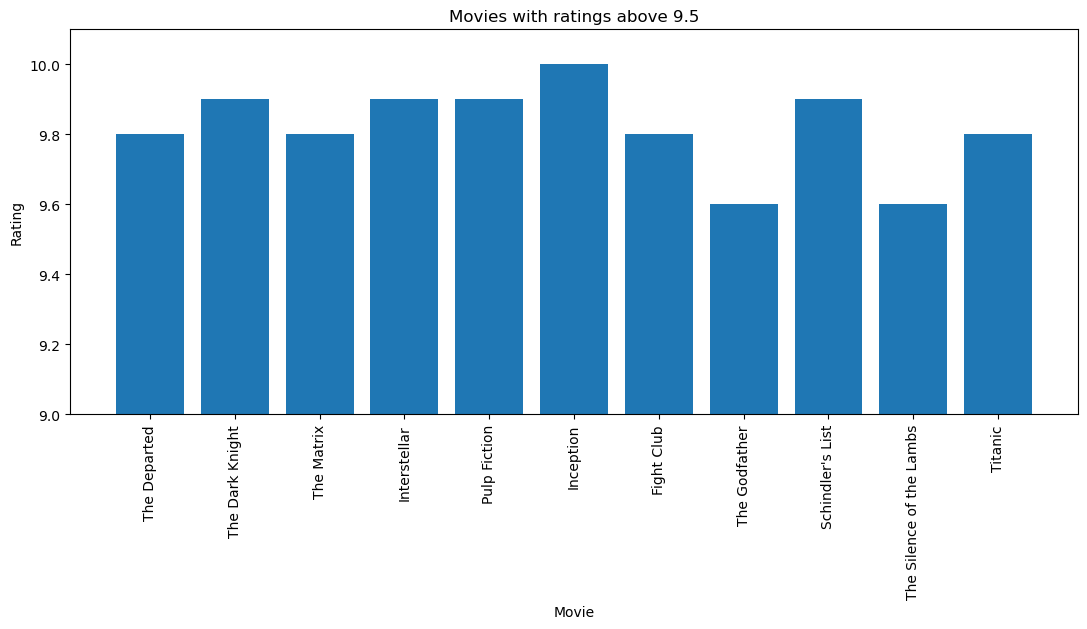

In [12]:
#Creating a bar plot of movies that have rating greater than 9.5
rating_95 = data[data['Rating'] > 9.5]
fig = plt.figure(figsize = (13,5))
plt.bar(rating_95['Title'], rating_95['Rating'])
plt.title("Movies with ratings above 9.5")
plt.xticks(rotation=90)
plt.ylim(9.0,10.1)
plt.xlabel('Movie')
plt.ylabel('Rating')
plt.show()

The above barplot displays the movies with ratings above 9.5.

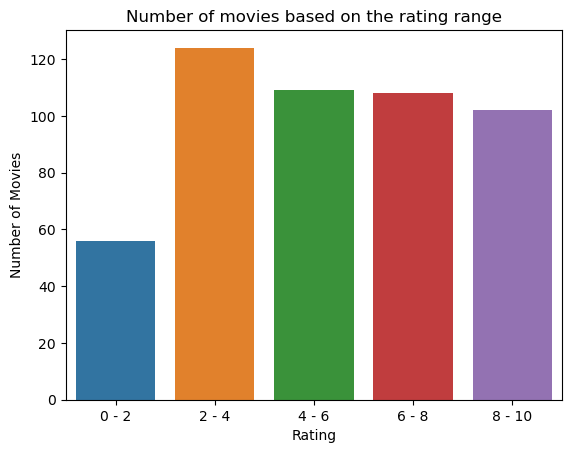

In [13]:
#Extracting number of movies based on the rating interval
rating_0_2 = data[(data['Rating'] >= 0) & (data['Rating'] < 2)]
rating_2_4 = data[(data['Rating'] >= 2) & (data['Rating'] < 4)]
rating_4_6 = data[(data['Rating'] >= 4) & (data['Rating'] < 6)]
rating_6_8 = data[(data['Rating'] >= 6) & (data['Rating'] < 8)]
rating_8_10 = data[(data['Rating'] >= 8) & (data['Rating'] < 10)]

#Storing the number of records extracted for each rating condition in a list
number_of_movies = [len(rating_0_2), len(rating_2_4), len(rating_4_6), len(rating_6_8), len(rating_8_10)]
rating_range = ['0 - 2', '2 - 4', '4 - 6', '6 - 8', '8 - 10']

#Generating and displaying the barplot
sns.barplot(x = rating_range, y = number_of_movies)
plt.title('Number of movies based on the rating range')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.show()

The above barplot displays the number of movies in specific rating categories mentioned.

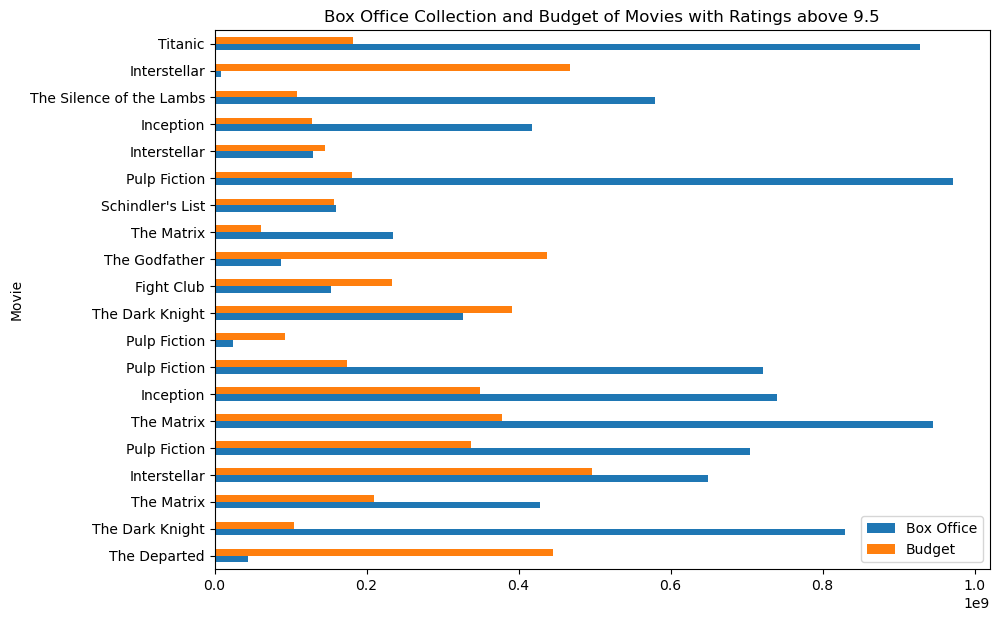

In [14]:
rating_95 = data[data['Rating'] > 9.5]

boxOffice_budget = {'Movie': [x for x in rating_95['Title']],
                    'Box Office': [x for x in rating_95['BoxOfficeCollection']],
                   'Budget': [x for x in rating_95['Budget']]}

boxOffice_budget_df = pd.DataFrame(boxOffice_budget, columns=['Movie', 'Box Office', 'Budget'])

boxOffice_budget_df.plot(x = 'Movie', y = ['Box Office', 'Budget'], kind = 'barh', figsize = (10,7), ylabel = 'Amount',
                        title = 'Box Office Collection and Budget of Movies with Ratings above 9.5')
plt.show()

The above horizontal bar plot represents the Box Office Collection and Budget of movies with ratings above 9.5.

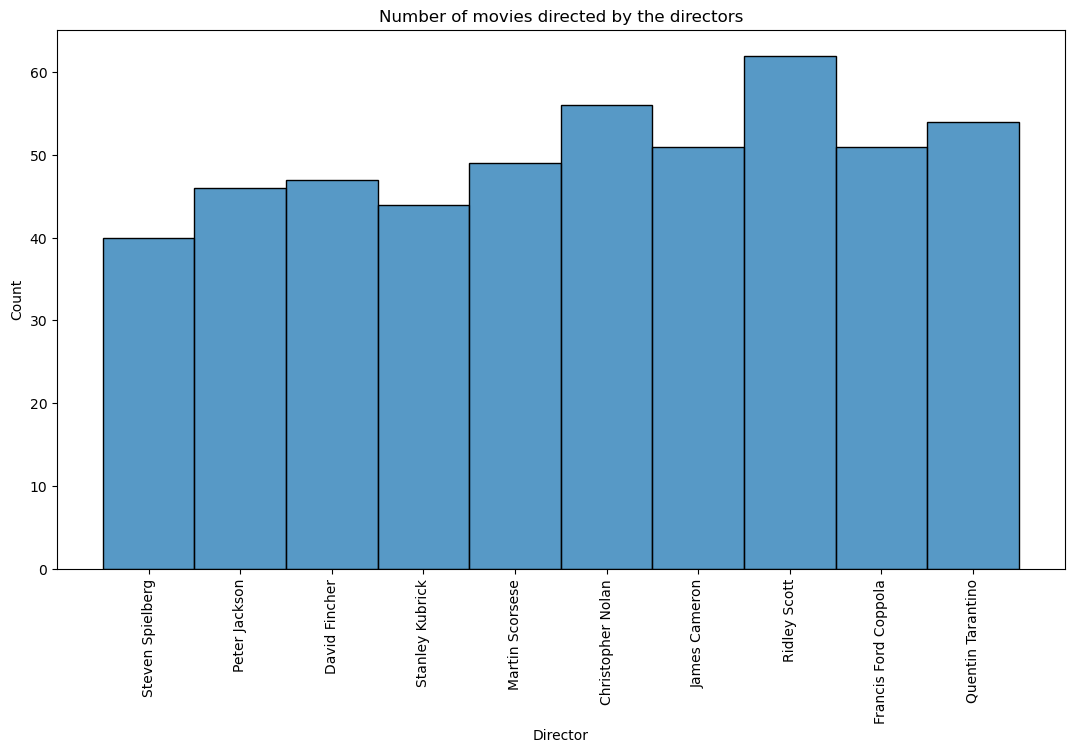

In [15]:
#Creating a histplot of number of movies directed by the given directors
fig = plt.figure(figsize = (13,7))
sns.histplot(data['Director'])
plt.title('Number of movies directed by the directors')
plt.xticks(rotation=90)
plt.show()

The above histplot represents the number of movies directed by the directors.